In [1]:
import os
import torchvision
import pandas as pd
from torchvision.io import read_image

In [2]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,random_split
from torchvision import transforms, utils,datasets

In [3]:
import matplotlib.pyplot as plt

In [4]:
t=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [5]:
train=datasets.MNIST(root='./data',train=True,download=True,transform=t)
test=datasets.MNIST(root='./data',train=False,download=True,transform=t)


100%|██████████| 9912422/9912422 [00:04<00:00, 2132275.51it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1227374.17it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1244767.82it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 1589663.62it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [8]:
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [19]:
train.targets[5]


tensor(2)

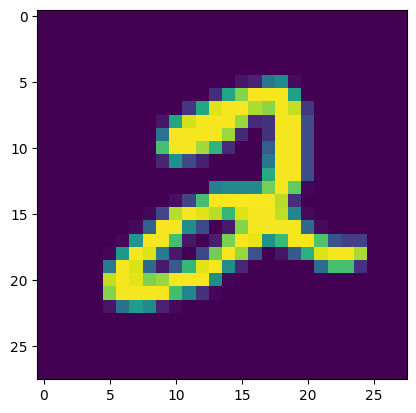

In [22]:
import numpy as np
plt.imshow(train.data[5].numpy())

In [23]:
total_len=len(train)
training_size=int(0.8*total_len)
valid_size=int(0.2*total_len)
print(training_size,valid_size)

48000 12000


In [24]:
trainSet,valSet=random_split(train,[training_size,valid_size])

In [25]:
trainSet

In [26]:
print(train.classes)
print(len(trainSet))
print(len(valSet))
print(len(test.data))

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
48000
12000
10000


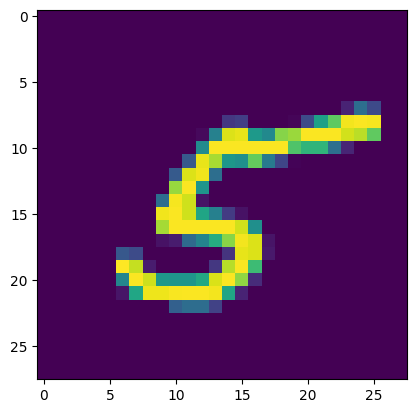

In [40]:
plt.imshow(trainSet[0][0].squeeze().numpy())
plt.show()

In [28]:
print((train.data[80]).size())

torch.Size([28, 28])


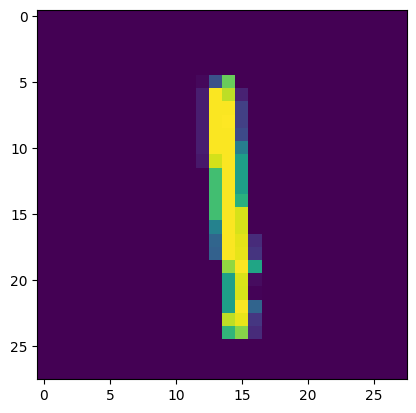

In [23]:
import numpy as np
plt.imshow(train.data[8].numpy())

In [41]:

train_loader = DataLoader(trainSet, batch_size=64, shuffle=True)
val_loader = DataLoader(valSet, batch_size=64, shuffle=False)
test_loader = DataLoader(test, batch_size=64, shuffle=False)

In [46]:
train_loader.dataset[4]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [57]:

dataiter = iter(train_loader)
for images, labels in dataiter:
    print(images.shape, labels.shape)
    break


torch.Size([64, 1, 28, 28]) torch.Size([64])


In [55]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [56]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
import torch

In [60]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()

        val_loss /= len(val_loader)
        print(f"Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}")

Epoch 1/5, Validation Loss: 0.1878
Epoch 2/5, Validation Loss: 0.1517
Epoch 3/5, Validation Loss: 0.1316
Epoch 4/5, Validation Loss: 0.1143
Epoch 5/5, Validation Loss: 0.1161


In [61]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [64]:
print("Accuracy : ",correct/total)

Accuracy :  0.9692


In [65]:
torch.save(model.state_dict(), 'handwritten_digit_model.pth')
print("Model saved as 'handwritten_digit_model.pth'")

Model saved as 'handwritten_digit_model.pth'
